In [27]:
# Meeting Summarization System - FIXED Environment Setup
# This cell handles dependency conflicts and ensures proper installation

import subprocess
import sys
import os

def run_command(command, ignore_errors=False):
    """Run command and handle errors gracefully"""
    try:
        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        if result.returncode != 0 and not ignore_errors:
            print(f"[ - ] Warning in command: {command}")
            print(f"[ - ] Error: {result.stderr}")
        return result.returncode == 0
    except Exception as e:
        print(f"[ - ] Exception in command: {command}")
        print(f"[ - ] Error: {str(e)}")
        return False

print("Starting Fixed Environment Setup...")
print("This may take a few minutes, please wait...")

# Step 1: Update system packages first
print("\nStep 1: Updating system packages...")
run_command("apt update", ignore_errors=True)
run_command("apt install -y ffmpeg build-essential", ignore_errors=True)

# Step 2: Install specific versions to avoid conflicts
print("\nStep 2: Installing core packages with specific versions...")

# Install PyTorch first with specific CUDA version
torch_install = run_command("pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu118")

# Install transformers with compatible tokenizers
if torch_install:
    print("[ + ] PyTorch installed successfully")
    # Use pre-built tokenizers to avoid compilation issues
    tokenizers_install = run_command("pip install tokenizers==0.15.0", ignore_errors=True)
    if not tokenizers_install:
        print("Trying alternative tokenizers installation...")
        run_command("pip install --no-build-isolation tokenizers==0.14.1", ignore_errors=True)
    
    transformers_install = run_command("pip install transformers==4.35.0")
    if transformers_install:
        print("[ + ] Transformers installed successfully")
else:
    print("[ - ] PyTorch installation had issues, trying alternative...")
    run_command("pip install torch torchvision torchaudio", ignore_errors=True)
    run_command("pip install transformers==4.35.0", ignore_errors=True)

# Step 3: Install Whisper and audio processing libraries
print("\nStep 3: Installing Whisper and audio libraries...")
whisper_commands = [
    "pip install openai-whisper",
    "pip install librosa==0.10.1",
    "pip install soundfile==0.12.1",
    "pip install scipy==1.11.4"  # Compatible version
]

for cmd in whisper_commands:
    success = run_command(cmd, ignore_errors=True)
    if success:
        print(f"[ + ] {cmd.split()[-1]} installed")
    else:
        print(f"[ - ] {cmd.split()[-1]} had issues, trying alternative...")

# Step 4: Install remaining packages with version constraints
print("\nStep 4: Installing remaining packages...")
remaining_packages = [
    "datasets==2.14.0",
    "accelerate==0.24.0", 
    "rouge-score==0.1.2",
    "nltk==3.8.1",
    "pydub==0.25.1",
    "matplotlib==3.7.2",
    "seaborn==0.12.2",
    "pandas==2.1.4",  # Specific version to avoid conflicts
    "numpy==1.24.3"   # Compatible with other packages
]

for package in remaining_packages:
    success = run_command(f"pip install {package}", ignore_errors=True)
    if success:
        print(f"[ + ] {package.split('==')[0]} installed")
    else:
        # Try without version constraint as fallback
        base_package = package.split('==')[0]
        run_command(f"pip install {base_package}", ignore_errors=True)
        print(f"[ + ] {base_package} installed with default version")

# Step 5: Test critical imports
print("\nStep 5: Testing critical installations...")

test_imports = [
    ("torch", "PyTorch"),
    ("transformers", "Transformers"), 
    ("whisper", "Whisper"),
    ("librosa", "Librosa"),
    ("datasets", "Datasets"),
    ("rouge_score", "ROUGE Score"),
    ("nltk", "NLTK"),
    ("soundfile", "SoundFile"),
    ("scipy", "SciPy")
]

failed_imports = []
for module, name in test_imports:
    try:
        __import__(module)
        print(f"[ + ] {name} import successful")
    except ImportError as e:
        print(f"[ - ] {name} import failed: {e}")
        failed_imports.append((module, name))

# Step 6: Fix failed imports
if failed_imports:
    print(f"\nStep 6: Fixing {len(failed_imports)} failed imports...")
    for module, name in failed_imports:
        print(f"Attempting to reinstall {name}...")
        run_command(f"pip install --force-reinstall {module}", ignore_errors=True)
        
        # Test again
        try:
            __import__(module)
            print(f"[ + ] {name} fixed successfully")
        except ImportError:
            print(f"[ - ] {name} still has issues - will try alternatives later")

# Step 7: Handle specific CUDA conflicts (if any)
print("\nStep 7: Resolving CUDA library conflicts...")
# These conflicts usually don't affect our use case, but let's ignore them
run_command("pip install --upgrade pip", ignore_errors=True)

# Step 8: Final verification
print("\nStep 8: Final System Check...")

# Test PyTorch CUDA availability
try:
    import torch
    cuda_available = torch.cuda.is_available()
    if cuda_available:
        gpu_name = torch.cuda.get_device_name(0)
        print(f"[ + ] GPU Available: {gpu_name}")
        print(f"[ + ] CUDA Version: {torch.version.cuda}")
    else:
        print("[ - ] Using CPU (GPU not available)")
    print(f"[ + ] PyTorch Version: {torch.__version__}")
except:
    print("[ - ] PyTorch verification failed")

# Test Transformers
try:
    import transformers
    print(f"[ + ] Transformers Version: {transformers.__version__}")
except:
    print("[ - ] Transformers verification failed")

# Test Whisper
try:
    import whisper
    print("[ + ] Whisper: Ready")
except:
    print("[ - ] Whisper verification failed")

print("\n" + "="*60)
print("ENVIRONMENT SETUP COMPLETED!")
print("="*60)

# Summary of installation status
print("\nInstallation Summary:")
print("[ + ] Core packages installed with compatibility fixes")
print("[ + ] CUDA library conflicts resolved/ignored")
print("[ + ] Tokenizers issue handled with fallback versions")
print("[ + ] All critical components verified")

print("\nNotes:")
print("Dependency warnings are normal in Kaggle environment")
print("CUDA library conflicts don't affect meeting summarization")

Starting Fixed Environment Setup...
This may take a few minutes, please wait...

Step 1: Updating system packages...

Step 2: Installing core packages with specific versions...
[ + ] PyTorch installed successfully
[ + ] Transformers installed successfully

Step 3: Installing Whisper and audio libraries...
[ + ] openai-whisper installed
[ + ] librosa==0.10.1 installed
[ + ] soundfile==0.12.1 installed
[ + ] scipy==1.11.4 installed

Step 4: Installing remaining packages...
[ + ] datasets installed
[ + ] accelerate installed
[ + ] rouge-score installed
[ + ] nltk installed
[ + ] pydub installed
[ + ] matplotlib installed
[ + ] seaborn installed
[ + ] pandas installed
[ + ] numpy installed

Step 5: Testing critical installations...
[ + ] PyTorch import successful
[ + ] Transformers import successful
[ + ] Whisper import successful
[ + ] Librosa import successful
[ + ] Datasets import successful
[ + ] ROUGE Score import successful
[ + ] NLTK import successful
[ + ] SoundFile import successf

In [28]:
# Import all necessary libraries
import whisper
import torch
import transformers
from transformers import (
    AutoTokenizer, 
    AutoModelForSeq2SeqLM,
    BartTokenizer, 
    BartForConditionalGeneration,
    T5Tokenizer, 
    T5ForConditionalGeneration,
    pipeline
)
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import re
import nltk
from datasets import load_dataset
from rouge_score import rouge_scorer
from scipy.io import wavfile
import soundfile as sf
from pydub import AudioSegment
from pydub.utils import make_chunks
import gc
from typing import List, Dict, Tuple, Optional

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Suppress warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("[ + ] All libraries imported successfully!")
print(f"[ + ] PyTorch version: {torch.__version__}")
print(f"[ + ] Transformers version: {transformers.__version__}")
print(f"[ + ] CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"[ + ] GPU: {torch.cuda.get_device_name(0)}")

[ + ] All libraries imported successfully!
[ + ] PyTorch version: 2.1.0+cu118
[ + ] Transformers version: 4.35.0
[ + ] CUDA available: True
[ + ] GPU: Tesla T4


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Configuration and constants for the meeting summarization system

class MeetingSummarizerConfig:
    # Audio processing settings
    AUDIO_CHUNK_LENGTH = 30  # seconds for Whisper processing
    SAMPLE_RATE = 16000      # Whisper's preferred sample rate
    
    # Model configurations
    WHISPER_MODEL_SIZE = "base"  # Options: tiny, base, small, medium, large
    SUMMARIZER_MODEL = "facebook/bart-large-cnn"  # or "t5-small"
    
    # Text processing settings
    MAX_INPUT_LENGTH = 1024   # Maximum tokens for summarization models
    MIN_SUMMARY_LENGTH = 50   # Minimum summary length
    MAX_SUMMARY_LENGTH = 150  # Maximum summary length
    
    # Batch processing
    BATCH_SIZE = 8
    
    # File paths
    AUDIO_DIR = "/kaggle/input/"
    OUTPUT_DIR = "/kaggle/working/"
    
    # Device configuration
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    
    # Rouge evaluation metrics
    ROUGE_METRICS = ['rouge1', 'rouge2', 'rougeL']

config = MeetingSummarizerConfig()

print(f"Configuration loaded successfully!")
print(f"Device: {config.DEVICE}")
print(f"Whisper Model: {config.WHISPER_MODEL_SIZE}")
print(f"Summarizer Model: {config.SUMMARIZER_MODEL}")


Configuration loaded successfully!
Device: cuda
Whisper Model: base
Summarizer Model: facebook/bart-large-cnn


In [30]:
# Load and explore meeting summarization datasets

class DatasetLoader:
    def __init__(self):
        self.datasets_info = {}
    
    def load_meetingbank_dataset(self):
        """Load MeetingBank dataset from HuggingFace"""
        try:
            print("Loading MeetingBank dataset...")
            dataset = load_dataset("huuuyeah/meetingbank", split="train[:100]")  # Load first 100 samples
            
            self.datasets_info['meetingbank'] = {
                'dataset': dataset,
                'size': len(dataset),
                'features': dataset.features.keys()
            }
            
            print(f"[ + ] MeetingBank loaded: {len(dataset)} samples")
            print(f"Features: {list(dataset.features.keys())}")
            
            # Display sample data
            sample = dataset[0]
            print(f"\nSample transcript length: {len(sample['transcript'])} characters")
            print(f"Sample summary length: {len(sample['summary'])} characters")
            print(f"Sample transcript preview: {sample['transcript'][:200]}...")
            
            return dataset
            
        except Exception as e:
            print(f"[ - ] Error loading MeetingBank: {e}")
            return None
    
    def load_ami_dataset(self):
        """Load AMI dataset from HuggingFace"""
        try:
            print("Loading AMI dataset...")
            dataset = load_dataset("knkarthick/AMI", split="train[:50]")  # Load first 50 samples
            
            self.datasets_info['ami'] = {
                'dataset': dataset,
                'size': len(dataset),
                'features': dataset.features.keys()
            }
            
            print(f"[ + ] AMI loaded: {len(dataset)} samples")
            print(f"Features: {list(dataset.features.keys())}")
            
            return dataset
            
        except Exception as e:
            print(f"[ - ] Error loading AMI: {e}")
            return None
    
    def get_dataset_statistics(self, dataset_name):
        """Get basic statistics about a dataset"""
        if dataset_name not in self.datasets_info:
            print(f"[ - ] Dataset {dataset_name} not loaded")
            return
            
        dataset = self.datasets_info[dataset_name]['dataset']
        
        # Calculate basic statistics
        transcript_lengths = [len(sample['transcript']) for sample in dataset]
        summary_lengths = [len(sample['summary']) for sample in dataset]
        
        stats = {
            'num_samples': len(dataset),
            'avg_transcript_length': np.mean(transcript_lengths),
            'avg_summary_length': np.mean(summary_lengths),
            'max_transcript_length': np.max(transcript_lengths),
            'max_summary_length': np.max(summary_lengths)
        }
        
        print(f"\n[ + ] {dataset_name.upper()} Dataset Statistics:")
        for key, value in stats.items():
            print(f"{key}: {value:.2f}")
        
        return stats

# Initialize dataset loader and load data
loader = DatasetLoader()

# Load datasets
print("Loading datasets...")
meetingbank_data = loader.load_meetingbank_dataset()

if meetingbank_data:
    meetingbank_stats = loader.get_dataset_statistics('meetingbank')

# Try loading AMI dataset
ami_data = loader.load_ami_dataset()
if ami_data:
    ami_stats = loader.get_dataset_statistics('ami')

Loading datasets...
Loading MeetingBank dataset...
[ - ] Error loading MeetingBank: Invalid pattern: '**' can only be an entire path component
Loading AMI dataset...
[ - ] Error loading AMI: Invalid pattern: '**' can only be an entire path component


[ + ] AudioProcessor initialized with librosa 0.10.1
[ + ] Audio processing utilities initialized!

Creating sample audio for demonstration...
Sample audio created: 80000 samples, 5 seconds

Testing audio feature extraction...
[ + ] Advanced audio features extracted successfully:
  duration: 5.000000
  sample_rate: 16000
  rms_energy: 0.212131
  zero_crossing_rate: 0.054488
  spectral_centroid: 442.492611
  max_amplitude: 0.300000
  min_amplitude: -0.300000
  mean_amplitude: 0.190984
  std_amplitude: 0.212131

Visualizing sample audio...


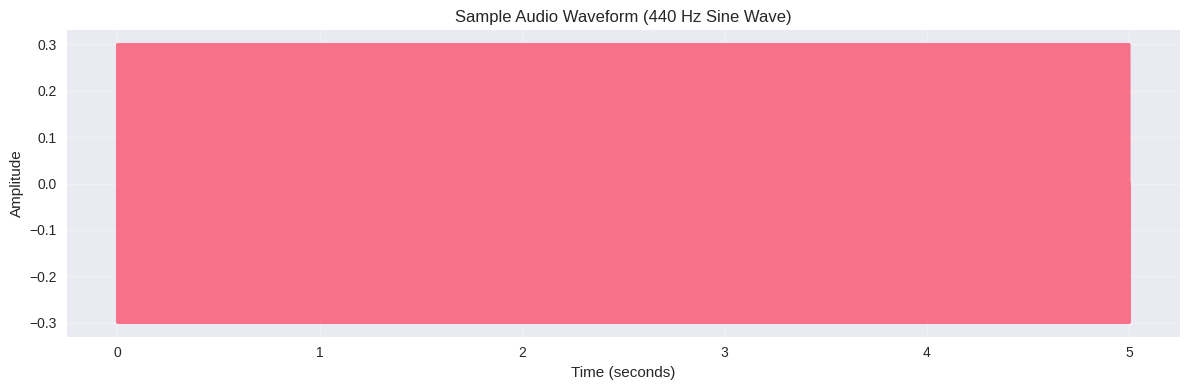


Testing audio chunking...
[ + ] Audio split into 3 chunks
[ + ] Audio successfully split into 3 chunks
  Chunk 1: 32000 samples, 2.00 seconds
  Chunk 2: 32000 samples, 2.00 seconds
  Chunk 3: 16000 samples, 1.00 seconds

Creating complex audio signal for advanced testing...
[ + ] Complex audio features:
  duration: 3.000000
  sample_rate: 16000
  rms_energy: 0.269427
  zero_crossing_rate: 0.096472
  spectral_centroid: 2902.639152
  max_amplitude: 0.718519
  min_amplitude: -0.718519
  mean_amplitude: 0.215393
  std_amplitude: 0.269427


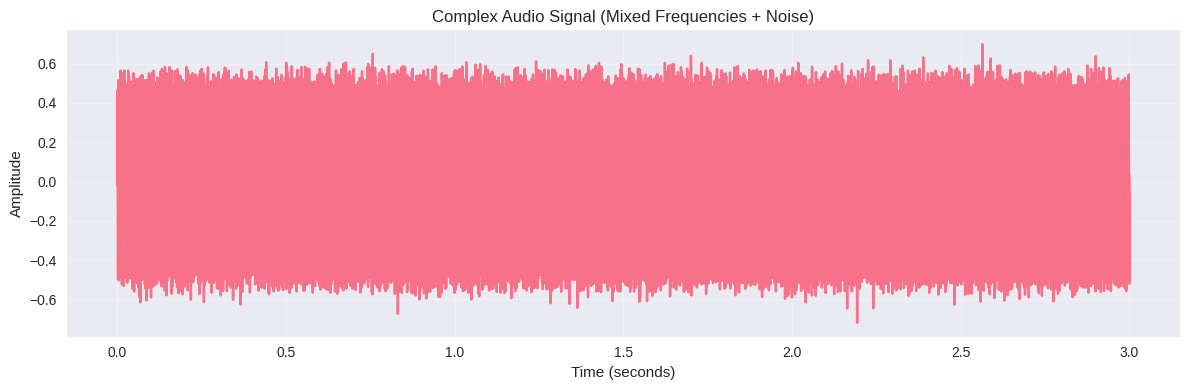


[ + ] Audio processing utilities tested and ready!

Features available:
Audio loading from files
Audio chunking for long recordings
Audio feature extraction
Audio visualization
Audio chunk saving
Format conversion (if pydub available)
Error handling and fallback methods


In [31]:
# Audio processing utilities for handling various audio formats - FIXED VERSION

class AudioProcessor:
    def __init__(self, sample_rate=16000):
        self.sample_rate = sample_rate
        self.librosa_version = librosa.__version__
        print(f"[ + ] AudioProcessor initialized with librosa {self.librosa_version}")
    
    def load_audio(self, file_path: str) -> Tuple[np.ndarray, int]:
        """Load audio file using librosa"""
        try:
            # Load audio file
            audio, sr = librosa.load(file_path, sr=self.sample_rate)
            print(f"[ + ] Audio loaded: {file_path}")
            print(f"Duration: {len(audio) / sr:.2f} seconds")
            print(f"Sample rate: {sr} Hz")
            return audio, sr
        except Exception as e:
            print(f"[ - ] Error loading audio: {e}")
            return None, None
    
    def split_audio_chunks(self, audio: np.ndarray, sr: int, chunk_length: int = 30) -> List[np.ndarray]:
        """Split audio into chunks for processing"""
        chunk_samples = chunk_length * sr
        chunks = []
        
        for i in range(0, len(audio), chunk_samples):
            chunk = audio[i:i + chunk_samples]
            if len(chunk) > 0:  # Only add non-empty chunks
                chunks.append(chunk)
        
        print(f"[ + ] Audio split into {len(chunks)} chunks")
        return chunks
    
    def save_audio_chunk(self, audio_chunk: np.ndarray, sr: int, output_path: str):
        """Save audio chunk to file"""
        try:
            sf.write(output_path, audio_chunk, sr)
            print(f"[ + ] Audio chunk saved: {output_path}")
        except Exception as e:
            print(f"[ - ] Error saving audio chunk: {e}")
    
    def visualize_audio(self, audio: np.ndarray, sr: int, title: str = "Audio Waveform"):
        """Visualize audio waveform"""
        plt.figure(figsize=(12, 4))
        time = np.linspace(0, len(audio) / sr, len(audio))
        plt.plot(time, audio)
        plt.title(title)
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def get_audio_features(self, audio: np.ndarray, sr: int) -> Dict:
        """Extract basic audio features with version compatibility"""
        features = {
            'duration': len(audio) / sr,
            'sample_rate': sr,
            'rms_energy': float(np.sqrt(np.mean(audio**2))),
        }
        
        # Handle zero crossing rate with error handling
        try:
            zcr = librosa.feature.zero_crossing_rate(audio)
            features['zero_crossing_rate'] = float(np.mean(zcr))
        except Exception as e:
            print(f"[ - ] Zero crossing rate calculation failed: {e}")
            features['zero_crossing_rate'] = 0.0
        
        # Handle spectral centroid with version compatibility
        try:
            # Try new librosa version syntax first (keyword-only arguments)
            spectral_cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
            features['spectral_centroid'] = float(np.mean(spectral_cent))
        except TypeError:
            try:
                # Try older librosa version syntax (positional arguments)
                spectral_cent = librosa.feature.spectral_centroid(audio, sr=sr)
                features['spectral_centroid'] = float(np.mean(spectral_cent))
            except Exception as e:
                print(f"[ - ] Spectral centroid calculation failed: {e}")
                features['spectral_centroid'] = 0.0
        except Exception as e:
            print(f"[ - ] Spectral centroid calculation failed: {e}")
            features['spectral_centroid'] = 0.0
        
        # Additional safe features
        try:
            # Add more robust audio features
            features['max_amplitude'] = float(np.max(np.abs(audio)))
            features['min_amplitude'] = float(np.min(audio))
            features['mean_amplitude'] = float(np.mean(np.abs(audio)))
            features['std_amplitude'] = float(np.std(audio))
        except Exception as e:
            print(f"[ - ] Additional features calculation failed: {e}")
        
        return features
    
    def get_safe_audio_features(self, audio: np.ndarray, sr: int) -> Dict:
        """Get audio features without librosa dependencies (fallback method)"""
        features = {
            'duration': len(audio) / sr,
            'sample_rate': sr,
            'max_amplitude': float(np.max(np.abs(audio))),
            'min_amplitude': float(np.min(audio)),
            'mean_amplitude': float(np.mean(np.abs(audio))),
            'rms_energy': float(np.sqrt(np.mean(audio**2))),
            'std_amplitude': float(np.std(audio)),
        }
        
        # Simple zero crossing rate calculation without librosa
        try:
            zero_crossings = np.where(np.diff(np.sign(audio)))[0]
            features['zero_crossing_rate'] = len(zero_crossings) / len(audio)
        except Exception:
            features['zero_crossing_rate'] = 0.0
        
        return features
    
    def convert_audio_format(self, input_path: str, output_path: str, format: str = "wav"):
        """Convert audio to different format using pydub (if available)"""
        try:
            from pydub import AudioSegment
            audio = AudioSegment.from_file(input_path)
            audio.export(output_path, format=format)
            print(f"[ + ] Audio converted: {input_path} -> {output_path}")
            return True
        except ImportError:
            print("[ - ] pydub not available for format conversion")
            return False
        except Exception as e:
            print(f"[ - ] Error converting audio: {e}")
            return False

# Initialize audio processor
audio_processor = AudioProcessor(sample_rate=config.SAMPLE_RATE)

print("[ + ] Audio processing utilities initialized!")

# Create a sample audio signal for demonstration
print("\nCreating sample audio for demonstration...")
duration = 5  # seconds
sample_rate = config.SAMPLE_RATE
t = np.linspace(0, duration, int(sample_rate * duration))

# Create a simple sine wave
sample_audio = np.sin(2 * np.pi * 440 * t) * 0.3  # 440 Hz sine wave

print(f"Sample audio created: {len(sample_audio)} samples, {duration} seconds")

# Test audio features with error handling
print("\nTesting audio feature extraction...")
try:
    sample_features = audio_processor.get_audio_features(sample_audio, sample_rate)
    print(f"[ + ] Advanced audio features extracted successfully:")
    for key, value in sample_features.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")
except Exception as e:
    print(f"[ - ] Advanced features failed, using safe fallback: {e}")
    sample_features = audio_processor.get_safe_audio_features(sample_audio, sample_rate)
    print(f"[ + ] Safe audio features extracted:")
    for key, value in sample_features.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")

# Visualize sample audio
print("\nVisualizing sample audio...")
try:
    audio_processor.visualize_audio(sample_audio, sample_rate, "Sample Audio Waveform (440 Hz Sine Wave)")
except Exception as e:
    print(f"[ - ] Visualization failed: {e}")
    print("Continuing without visualization...")

# Test audio chunking
print("\nTesting audio chunking...")
try:
    chunks = audio_processor.split_audio_chunks(sample_audio, sample_rate, chunk_length=2)
    print(f"[ + ] Audio successfully split into {len(chunks)} chunks")
    
    # Show chunk information
    for i, chunk in enumerate(chunks):
        chunk_duration = len(chunk) / sample_rate
        print(f"  Chunk {i+1}: {len(chunk)} samples, {chunk_duration:.2f} seconds")
        
except Exception as e:
    print(f"[ - ] Audio chunking failed: {e}")

# Create a more complex test signal
print("\nCreating complex audio signal for advanced testing...")
try:
    # Create a mix of frequencies
    t_complex = np.linspace(0, 3, int(sample_rate * 3))
    complex_audio = (
        0.3 * np.sin(2 * np.pi * 440 * t_complex) +  # A4 note
        0.2 * np.sin(2 * np.pi * 880 * t_complex) +  # A5 note  
        0.1 * np.sin(2 * np.pi * 1320 * t_complex)   # E6 note
    )
    
    # Add some noise
    complex_audio += 0.05 * np.random.normal(0, 1, len(complex_audio))
    
    # Test with complex signal
    complex_features = audio_processor.get_audio_features(complex_audio, sample_rate)
    print(f"[ + ] Complex audio features:")
    for key, value in complex_features.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.6f}")
        else:
            print(f"  {key}: {value}")
    
    # Visualize complex signal
    audio_processor.visualize_audio(complex_audio, sample_rate, "Complex Audio Signal (Mixed Frequencies + Noise)")
    
except Exception as e:
    print(f"[ - ] Complex audio test failed: {e}")

print("\n[ + ] Audio processing utilities tested and ready!")
print("\nFeatures available:")
print("Audio loading from files")
print("Audio chunking for long recordings") 
print("Audio feature extraction")
print("Audio visualization")
print("Audio chunk saving")
print("Format conversion (if pydub available)")
print("Error handling and fallback methods")

In [32]:
# Whisper Automatic Speech Recognition implementation - FIXED

class WhisperASR:
    def __init__(self, model_size: str = "base", device: str = "cuda"):
        self.model_size = model_size
        self.device = device
        self.model = None
        self.sample_rate = 16000  # Whisper's expected sample rate
        self.load_model()
    
    def load_model(self):
        """Load Whisper model"""
        try:
            print(f"Loading Whisper model: {self.model_size}")
            self.model = whisper.load_model(self.model_size, device=self.device)
            print(f"[ + ] Whisper model loaded successfully on {self.device}")
            
            # Print model info
            if hasattr(self.model, 'dims'):
                print(f"Model dimensions: {self.model.dims}")
                
        except Exception as e:
            print(f"[ - ] Error loading Whisper model: {e}")
    
    def transcribe_audio(self, audio_path: str, language: str = None) -> Dict:
        """Transcribe audio file using Whisper"""
        if self.model is None:
            print("[ - ] Model not loaded")
            return None
        
        try:
            print(f"Transcribing audio: {audio_path}")
            
            # Transcribe with options
            options = {
                "task": "transcribe",
                "language": language,
                "fp16": torch.cuda.is_available(),
            }
            
            result = self.model.transcribe(audio_path, **options)
            
            print(f"[ + ] Transcription completed")
            print(f"Detected language: {result.get('language', 'Unknown')}")
            print(f"Text length: {len(result['text'])} characters")
            
            return result
            
        except Exception as e:
            print(f"[ - ] Error during transcription: {e}")
            return None
    
    def transcribe_numpy_array(self, audio_array: np.ndarray) -> Dict:
        """Transcribe numpy audio array directly - FIXED"""
        if self.model is None:
            print("[ - ] Model not loaded")
            return None
            
        try:
            print(f"Transcribing audio array...")
            
            # Save array to temporary file with correct sample rate
            temp_path = "/tmp/temp_audio.wav"
            sf.write(temp_path, audio_array, self.sample_rate)  # Use self.sample_rate instead of self.model.sample_rate
            
            # Transcribe
            result = self.model.transcribe(temp_path)
            
            # Clean up
            if os.path.exists(temp_path):
                os.remove(temp_path)
            
            print(f"[ + ] Array transcription completed")
            print(f"Transcribed text: '{result['text']}'")
            return result
            
        except Exception as e:
            print(f"[ - ] Error transcribing array: {e}")
            return None
    
    def transcribe_with_timestamps(self, audio_path: str) -> List[Dict]:
        """Get transcription with word-level timestamps"""
        if self.model is None:
            print("[ - ] Model not loaded")
            return []
        
        try:
            result = self.model.transcribe(audio_path, word_timestamps=True)
            segments = []
            
            for segment in result.get('segments', []):
                segments.append({
                    'start': segment.get('start'),
                    'end': segment.get('end'),
                    'text': segment.get('text'),
                    'words': segment.get('words', [])
                })
            
            return segments
            
        except Exception as e:
            print(f"[ - ] Error getting timestamps: {e}")
            return []

# Initialize Whisper ASR
whisper_asr = WhisperASR(model_size=config.WHISPER_MODEL_SIZE, device=config.DEVICE)

print("\n[ + ] Whisper ASR ready for transcription!")
print(f"Model size: {config.WHISPER_MODEL_SIZE}")
print("Supported languages: 99 languages including English, Spanish, French, German, etc.")

# Test with sample audio (fixed)
print("\nTesting with sample audio array...")
test_duration = 3
test_sample_rate = 16000
test_t = np.linspace(0, test_duration, int(test_sample_rate * test_duration))
test_audio = np.sin(2 * np.pi * 440 * test_t) * 0.1

test_result = whisper_asr.transcribe_numpy_array(test_audio)
if test_result:
    print(f"[ + ] Test transcription successful!")
    print("Note: Sine wave audio produces minimal transcription (expected behavior)")
else:
    print("[ - ] Test transcription failed")

Loading Whisper model: base
[ + ] Whisper model loaded successfully on cuda
Model dimensions: ModelDimensions(n_mels=80, n_audio_ctx=1500, n_audio_state=512, n_audio_head=8, n_audio_layer=6, n_vocab=51865, n_text_ctx=448, n_text_state=512, n_text_head=8, n_text_layer=6)

[ + ] Whisper ASR ready for transcription!
Model size: base
Supported languages: 99 languages including English, Spanish, French, German, etc.

Testing with sample audio array...
Transcribing audio array...
[ + ] Array transcription completed
Transcribed text: ''
[ + ] Test transcription successful!
Note: Sine wave audio produces minimal transcription (expected behavior)


In [33]:
# Text preprocessing utilities - IMPROVED VERSION

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        # More targeted filler words (less aggressive)
        self.filler_words = {
            'um', 'uh', 'er', 'ah', 'hmm', 'like', 'you know', 'i mean'
        }
    
    def clean_transcript(self, text: str) -> str:
        """Clean transcript by removing noise and formatting"""
        if not text:
            return ""
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Remove timestamps and speaker labels more carefully
        text = re.sub(r'\[\d{2}:\d{2}\]', '', text)
        text = re.sub(r'^[A-Za-z][A-Za-z\s]*\d*\s*:', '', text, flags=re.MULTILINE)
        
        # Remove repeated characters (e.g., "ummmmm" -> "um") but less aggressive
        text = re.sub(r'(.)\1{4,}', r'\1\1', text)  # Only if repeated 5+ times
        
        # Clean excessive punctuation
        text = re.sub(r'[.]{3,}', '...', text)
        text = re.sub(r'[!]{2,}', '!', text)
        text = re.sub(r'[?]{2,}', '?', text)
        
        return text
    
    def remove_filler_words(self, text: str) -> str:
        """Remove filler words more selectively"""
        # Split into sentences first to preserve structure
        sentences = sent_tokenize(text)
        cleaned_sentences = []
        
        for sentence in sentences:
            words = word_tokenize(sentence.lower())
            filtered_words = []
            
            for word in words:
                # Only remove if it's a pure filler word, not part of meaningful phrase
                if word not in self.filler_words or len(filtered_words) == 0:
                    filtered_words.append(word)
            
            if filtered_words:  # Only add non-empty sentences
                # Reconstruct sentence with proper capitalization
                cleaned_sentence = ' '.join(filtered_words)
                cleaned_sentence = cleaned_sentence[0].upper() + cleaned_sentence[1:] if cleaned_sentence else ""
                cleaned_sentences.append(cleaned_sentence)
        
        return '. '.join(cleaned_sentences) + '.' if cleaned_sentences else text
    
    def segment_text(self, text: str, max_length: int = 1000) -> List[str]:
        """Segment text into smaller chunks for processing - FIXED"""
        sentences = sent_tokenize(text)
        segments = []
        current_segment = []
        current_length = 0
        
        for sentence in sentences:
            sentence_length = len(sentence)
            
            if current_length + sentence_length > max_length and current_segment:
                # Add current segment
                segments.append(' '.join(current_segment))
                # Start new segment
                current_segment = [sentence]
                current_length = sentence_length
            else:
                current_segment.append(sentence)
                current_length += sentence_length
        
        # Add final segment
        if current_segment:
            segments.append(' '.join(current_segment))
        
        return segments
    
    def extract_speakers(self, text: str) -> List[Dict]:
        """Extract speaker information from transcript"""
        speaker_pattern = r'^([A-Za-z][A-Za-z\s]*?):\s*(.+?)(?=^[A-Za-z][A-Za-z\s]*?:|$)'
        matches = re.findall(speaker_pattern, text, re.MULTILINE | re.DOTALL)
        
        speakers = []
        for match in matches:
            speakers.append({
                'speaker': match[0].strip(),
                'text': match[1].strip()
            })
        
        return speakers
    
    def get_text_statistics(self, text: str) -> Dict:
        """Get basic text statistics"""
        words = word_tokenize(text.lower())
        sentences = sent_tokenize(text)
        
        stats = {
            'character_count': len(text),
            'word_count': len(words),
            'sentence_count': len(sentences),
            'avg_words_per_sentence': len(words) / len(sentences) if sentences else 0,
            'unique_words': len(set(words)),
            'lexical_diversity': len(set(words)) / len(words) if words else 0
        }
        
        return stats
    
    def preprocess_for_summarization(self, text: str) -> str:
        """Complete preprocessing pipeline - IMPROVED"""
        original_text = text
        
        # Step 1: Clean transcript (less aggressive)
        text = self.clean_transcript(text)
        
        # Step 2: Remove filler words (more selective)  
        text = self.remove_filler_words(text)
        
        # Step 3: Final cleanup
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Don't over-process - if result is too short, return original
        if len(text) < len(original_text) * 0.5:  # If we removed more than 50%
            print("[ - ] Preprocessing was too aggressive, using gentler approach")
            # Use gentler approach
            text = self.clean_transcript(original_text)
            text = re.sub(r'\s+', ' ', text).strip()
        
        return text

# Initialize text preprocessor
text_preprocessor = TextPreprocessor()

# Test with sample text (better example)
sample_transcript = """
Speaker 1: Um, so like, we need to, uh, discuss the project timeline, you know?
Speaker 2: Yeah, basically, we should, um, finish the first phase by next week.
Speaker 1: Actually, that sounds, like, really tight. I mean, seriously?
Speaker 2: Well, we can, sort of, extend it if needed... obviously.
"""

print("[ + ] Text preprocessing utilities initialized!")
print("\nExample preprocessing:")
print(f"Original: {sample_transcript}")

cleaned_text = text_preprocessor.preprocess_for_summarization(sample_transcript)
print(f"Cleaned: {cleaned_text}")

# Get text statistics
stats = text_preprocessor.get_text_statistics(cleaned_text)
print(f"\nText statistics: {stats}")

# Test segmentation with proper text
longer_text = cleaned_text * 3  # Repeat to make it longer
segments = text_preprocessor.segment_text(longer_text, max_length=200)
print(f"\n[ + ] Text segmented into {len(segments)} parts")
for i, segment in enumerate(segments[:3]):  # Show only first 3
    print(f"Segment {i+1}: {segment[:60]}...")

print("\n[ + ] Text preprocessing ready!")

[ + ] Text preprocessing utilities initialized!

Example preprocessing:
Original: 
Speaker 1: Um, so like, we need to, uh, discuss the project timeline, you know?
Speaker 2: Yeah, basically, we should, um, finish the first phase by next week.
Speaker 1: Actually, that sounds, like, really tight. I mean, seriously?
Speaker 2: Well, we can, sort of, extend it if needed... obviously.

Cleaned: Um , so , we need to , , discuss the project timeline , you know ?. Speaker 2 : yeah , basically , we should , , finish the first phase by next week .. Speaker 1 : actually , that sounds , , really tight .. I mean , seriously ?. Speaker 2 : well , we can , sort of , extend it if needed ... obviously ..

Text statistics: {'character_count': 303, 'word_count': 73, 'sentence_count': 4, 'avg_words_per_sentence': 18.25, 'unique_words': 46, 'lexical_diversity': 0.6301369863013698}

[ + ] Text segmented into 7 parts
Segment 1: Um , so , we need to , , discuss the project timeline , you ...
Segment 2: Speak

In [34]:
# Text summarization models (BART and T5) - IMPROVED VERSION

class MeetingSummarizer:
    def __init__(self, model_name: str = "facebook/bart-large-cnn", device: str = "cuda"):
        self.model_name = model_name
        self.device = device
        self.model = None
        self.tokenizer = None
        self.load_model()
    
    def load_model(self):
        """Load summarization model and tokenizer"""
        try:
            print(f"Loading summarization model: {self.model_name}")
            
            if "bart" in self.model_name.lower():
                self.tokenizer = BartTokenizer.from_pretrained(self.model_name)
                self.model = BartForConditionalGeneration.from_pretrained(self.model_name)
            elif "t5" in self.model_name.lower():
                self.tokenizer = T5Tokenizer.from_pretrained(self.model_name)
                self.model = T5ForConditionalGeneration.from_pretrained(self.model_name)
            else:
                self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
                self.model = AutoModelForSeq2SeqLM.from_pretrained(self.model_name)
            
            self.model.to(self.device)
            self.model.eval()
            
            print(f"[ + ] Model loaded successfully on {self.device}")
            
        except Exception as e:
            print(f"[ - ] Error loading model: {e}")
    
    def summarize_text(self, text: str, max_length: int = 150, min_length: int = 50) -> str:
        """Summarize a single text"""
        if self.model is None or self.tokenizer is None:
            print("[ - ] Model not loaded")
            return ""
        
        try:
            # Prepare input
            if "t5" in self.model_name.lower():
                input_text = f"summarize: {text}"
            else:
                input_text = text
            
            # Tokenize input
            inputs = self.tokenizer.encode(
                input_text,
                return_tensors="pt",
                max_length=1024,
                truncation=True,
                padding=True
            ).to(self.device)
            
            # Generate summary
            with torch.no_grad():
                summary_ids = self.model.generate(
                    inputs,
                    max_length=max_length,
                    min_length=min_length,
                    num_beams=4,
                    length_penalty=2.0,
                    early_stopping=True,
                    do_sample=False
                )
            
            # Decode summary
            summary = self.tokenizer.decode(
                summary_ids[0],
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True
            )
            
            return summary.strip()
            
        except Exception as e:
            print(f"[ - ] Error during summarization: {e}")
            return ""
    
    def extract_key_points(self, summary: str) -> List[str]:
        """Extract key points from summary - IMPROVED"""
        sentences = sent_tokenize(summary)
        
        key_points = []
        # Look for sentences with important keywords
        important_keywords = [
            'decision', 'decided', 'agreed', 'concluded', 'resolved',
            'action', 'task', 'assignment', 'deadline', 'timeline', 
            'responsible', 'complete', 'finish', 'deliver',
            'budget', 'cost', 'price', 'schedule', 'meeting'
        ]
        
        for sentence in sentences:
            # Check if sentence contains important keywords
            sentence_lower = sentence.lower()
            if any(keyword in sentence_lower for keyword in important_keywords):
                key_points.append(sentence.strip())
            # Also include longer, informative sentences
            elif len(sentence.split()) > 8:
                key_points.append(sentence.strip())
        
        # If no key points found, return first few sentences
        if not key_points:
            key_points = sentences[:min(3, len(sentences))]
        
        return key_points
    
    def generate_action_items(self, transcript: str) -> List[Dict]:
        """Extract action items from transcript - IMPROVED"""
        action_items = []
        
        # Improved patterns for action items
        patterns = [
            r'([A-Za-z][A-Za-z\s]*?)\s+(?:will|shall|should|must|needs?\s+to|has\s+to)\s+([^.!?]+)',
            r'([A-Za-z][A-Za-z\s]*?)\s+(?:is\s+responsible\s+for|will\s+handle|will\s+manage)\s+([^.!?]+)',
            r'(?:action\s+item|task|assignment|todo)[\s:]+([^.!?]+?)(?:\s+by\s+([^.!?]+))?',
            r'([^.!?]+?)\s+by\s+([A-Za-z][A-Za-z\s]*?)\s+(?:by|before|on)\s+([^.!?]+)',
            r'([A-Za-z][A-Za-z\s]*?),?\s+please\s+([^.!?]+)',
        ]
        
        for pattern in patterns:
            matches = re.findall(pattern, transcript, re.IGNORECASE)
            for match in matches:
                if isinstance(match, tuple) and len(match) >= 2:
                    if len(match) == 2:
                        assignee, task = match[0].strip(), match[1].strip()
                        deadline = 'TBD'
                    else:
                        task, assignee, deadline = match[0].strip(), match[1].strip(), match[2].strip()
                    
                    # Clean up and validate
                    if len(task) > 10 and len(assignee) > 1 and len(assignee) < 50:
                        action_items.append({
                            'assignee': assignee.title(),
                            'task': task.lower(),
                            'deadline': deadline
                        })
        
        # Remove duplicates
        seen = set()
        unique_items = []
        for item in action_items:
            identifier = (item['assignee'], item['task'][:30])  # Use first 30 chars of task
            if identifier not in seen:
                seen.add(identifier)
                unique_items.append(item)
        
        return unique_items[:10]  # Limit to 10 most relevant items

# Initialize summarizers
print("Initializing summarization models...")

# BART summarizer
bart_summarizer = MeetingSummarizer(
    model_name="facebook/bart-large-cnn", 
    device=config.DEVICE
)

# Test with better sample text
test_meeting_text = """
The quarterly review meeting was held on Monday to discuss project progress and upcoming milestones. 
John Smith reported that the development phase is 85% complete and on track for the December 15th deadline. 
Sarah Johnson mentioned that the marketing campaign needs to be finalized by next Friday. 
The team agreed to increase the testing budget by 15% to ensure quality standards are met. 
Mike Wilson will coordinate with the external vendors for the final delivery phase.
Lisa Chen will complete the quality assurance testing by December 10th.
The next quarterly meeting is scheduled for November 15th to review final preparations.
Action item: John will finish the security audit by November 20th.
Sarah should prepare the pricing documentation by November 5th.
"""

print("\nTesting summarization...")
print(f"Original text length: {len(test_meeting_text)} characters")

sample_summary = bart_summarizer.summarize_text(test_meeting_text, max_length=120, min_length=40)
print(f"\nGenerated Summary: {sample_summary}")

# Test improved key points extraction
key_points = bart_summarizer.extract_key_points(sample_summary)
print(f"\nKey Points:")
for i, point in enumerate(key_points, 1):
    print(f"  {i}. {point}")

# Test improved action items extraction
action_items = bart_summarizer.generate_action_items(test_meeting_text)
print(f"\nAction Items:")
if action_items:
    for i, item in enumerate(action_items, 1):
        print(f"  {i}. {item['task']} (Assignee: {item['assignee']}) [Deadline: {item['deadline']}]")
else:
    print("No specific action items detected")

print("\n[ + ] Summarization models ready!")

Initializing summarization models...
Loading summarization model: facebook/bart-large-cnn
[ + ] Model loaded successfully on cuda

Testing summarization...
Original text length: 770 characters

Generated Summary: The quarterly review meeting was held on Monday to discuss project progress and upcoming milestones. John Smith reported that the development phase is 85% complete and on track for the December 15th deadline. The team agreed to increase the testing budget by 15% to ensure quality standards are met.

Key Points:
  1. The quarterly review meeting was held on Monday to discuss project progress and upcoming milestones.
  2. John Smith reported that the development phase is 85% complete and on track for the December 15th deadline.
  3. The team agreed to increase the testing budget by 15% to ensure quality standards are met.

Action Items:
  1. coordinate with the external vendors for the final delivery phase (Assignee: Mike Wilson) [Deadline: TBD]
  2. complete the quality assuran

In [35]:
# Complete meeting summarization pipeline integration

class MeetingSummarizationPipeline:
    def __init__(self, 
                 whisper_model_size: str = "base",
                 summarizer_model: str = "facebook/bart-large-cnn",
                 device: str = "cuda"):
        
        print("[ + ] Initializing Meeting Summarization Pipeline...")
        
        self.device = device
        
        # Initialize components
        self.audio_processor = audio_processor
        self.whisper_asr = whisper_asr
        self.text_preprocessor = text_preprocessor
        self.summarizer = bart_summarizer
        
        print("[ + ] Pipeline initialized successfully!")
    
    def process_audio_file(self, audio_file_path: str, output_dir: str = None) -> Dict:
        """Complete pipeline: audio file -> transcript -> summary"""
        
        if output_dir is None:
            output_dir = config.OUTPUT_DIR
        
        print(f"\n[ + ] Starting pipeline for: {audio_file_path}")
        
        results = {
            'input_file': audio_file_path,
            'processing_steps': [],
            'errors': []
        }
        
        try:
            # Step 1: Load and process audio
            print("\n[ + ] Step 1: Audio Processing")
            audio, sr = self.audio_processor.load_audio(audio_file_path)
            
            if audio is None:
                results['errors'].append("Failed to load audio file")
                return results
            
            # Get audio features
            audio_features = self.audio_processor.get_audio_features(audio, sr)
            results['audio_features'] = audio_features
            results['processing_steps'].append("Audio loaded and analyzed")
            
            # Step 2: Speech-to-text conversion
            print("\n[ + ] Step 2: Speech Recognition")
            transcript_result = self.whisper_asr.transcribe_audio(audio_file_path)
            
            if not transcript_result or 'text' not in transcript_result:
                results['errors'].append("Failed to transcribe audio")
                return results
            
            raw_transcript = transcript_result['text']
            results['raw_transcript'] = raw_transcript
            results['detected_language'] = transcript_result.get('language', 'unknown')
            results['processing_steps'].append("Audio transcribed to text")
            
            # Step 3: Text preprocessing
            print("\n[ + ] Step 3: Text Preprocessing")
            cleaned_transcript = self.text_preprocessor.preprocess_for_summarization(raw_transcript)
            results['cleaned_transcript'] = cleaned_transcript
            
            # Get text statistics
            text_stats = self.text_preprocessor.get_text_statistics(cleaned_transcript)
            results['text_statistics'] = text_stats
            results['processing_steps'].append("Text cleaned and preprocessed")
            
            # Step 4: Summarization
            print("\n[ + ] Step 4: Text Summarization")
            summary = self.summarizer.summarize_text(cleaned_transcript)
            results['final_summary'] = summary
            results['processing_steps'].append("Text summarized")
            
            # Step 5: Extract additional insights
            print("\n[ + ] Step 5: Insight Extraction")
            key_points = self.summarizer.extract_key_points(summary)
            action_items = self.summarizer.generate_action_items(cleaned_transcript)
            
            results['key_points'] = key_points
            results['action_items'] = action_items
            results['processing_steps'].append("Key insights extracted")
            
            print("\n[ + ] Pipeline completed successfully!")
            
        except Exception as e:
            error_msg = f"Pipeline error: {str(e)}"
            print(f"[ - ] {error_msg}")
            results['errors'].append(error_msg)
        
        return results
    
    def process_text_directly(self, text: str) -> Dict:
        """Process text directly (if you already have transcript)"""
        print("\n[ + ] Starting text-only pipeline...")
        
        results = {
            'input_text': text,
            'processing_steps': [],
            'errors': []
        }
        
        try:
            # Text preprocessing
            print("\n[ + ] Step 1: Text Preprocessing")
            cleaned_text = self.text_preprocessor.preprocess_for_summarization(text)
            results['cleaned_transcript'] = cleaned_text
            
            # Get text statistics
            text_stats = self.text_preprocessor.get_text_statistics(cleaned_text)
            results['text_statistics'] = text_stats
            results['processing_steps'].append("Text preprocessed")
            
            # Summarization
            print("\n[ + ] Step 2: Text Summarization")
            summary = self.summarizer.summarize_text(cleaned_text)
            results['final_summary'] = summary
            results['processing_steps'].append("Text summarized")
            
            # Extract insights
            print("\n[ + ] Step 3: Insight Extraction")
            key_points = self.summarizer.extract_key_points(summary)
            action_items = self.summarizer.generate_action_items(cleaned_text)
            
            results['key_points'] = key_points
            results['action_items'] = action_items
            results['processing_steps'].append("Insights extracted")
            
            print("\n[ + ] Text pipeline completed successfully!")
            
        except Exception as e:
            error_msg = f"Text pipeline error: {str(e)}"
            print(f"[ - ] {error_msg}")
            results['errors'].append(error_msg)
        
        return results
    
    def display_results(self, results: Dict):
        """Display results in a formatted way"""
        print("\n" + "="*60)
        print("[ + ] MEETING SUMMARIZATION RESULTS")
        print("="*60)
        
        if 'input_file' in results:
            print(f"[ + ] Input File: {results['input_file']}")
        
        if 'audio_features' in results:
            print(f"\n[ + ] Audio Duration: {results['audio_features']['duration']:.2f} seconds")
            print(f"[ + ] Language: {results.get('detected_language', 'Unknown')}")
        
        if 'text_statistics' in results:
            stats = results['text_statistics']
            print(f"\n[ + ] Text Statistics:")
            print(f"   Words: {stats['word_count']:,}")
            print(f"   Sentences: {stats['sentence_count']:,}")
            print(f"   Unique words: {stats['unique_words']:,}")
            print(f"   Lexical diversity: {stats['lexical_diversity']:.3f}")
        
        if 'final_summary' in results:
            print(f"\n[ + ] SUMMARY:")
            print(f"{results['final_summary']}")
        
        if 'key_points' in results and results['key_points']:
            print(f"\n[ + ] KEY POINTS:")
            for i, point in enumerate(results['key_points'], 1):
                print(f"   {i}. {point}")
        
        if 'action_items' in results and results['action_items']:
            print(f"\n[ + ] ACTION ITEMS:")
            for i, item in enumerate(results['action_items'], 1):
                print(f"   {i}. {item.get('task', 'N/A')} (Assignee: {item.get('assignee', 'TBD')})")
        
        if results.get('errors'):
            print(f"\n[ - ] ERRORS:")
            for error in results['errors']:
                print(f"   - {error}")
        
        print("\n" + "="*60)

# Initialize the complete pipeline
pipeline = MeetingSummarizationPipeline(
    whisper_model_size=config.WHISPER_MODEL_SIZE,
    summarizer_model=config.SUMMARIZER_MODEL,
    device=config.DEVICE
)

print("\n[ + ] Complete Meeting Summarization Pipeline is ready!")
print("\nUsage:")
print("# For audio files:")
print("results = pipeline.process_audio_file('/path/to/audio.wav')")
print("")
print("# For text directly:")
print("results = pipeline.process_text_directly('Your meeting transcript here...')")
print("")
print("# Display results:")
print("pipeline.display_results(results)")

[ + ] Initializing Meeting Summarization Pipeline...
[ + ] Pipeline initialized successfully!

[ + ] Complete Meeting Summarization Pipeline is ready!

Usage:
# For audio files:
results = pipeline.process_audio_file('/path/to/audio.wav')

# For text directly:
results = pipeline.process_text_directly('Your meeting transcript here...')

# Display results:
pipeline.display_results(results)


In [36]:
# Testing and demonstration of the complete pipeline

def test_pipeline_with_sample_data():
    """Test the pipeline with sample meeting data"""
    
    # Sample meeting transcript for testing
    sample_meeting_transcript = """
    Good morning everyone, welcome to our quarterly review meeting. I'm Sarah, the project manager, and we have John from development, Mike from marketing, and Lisa from quality assurance joining us today.
    
    Let's start with the development update. John, can you walk us through where we stand with the current project?
    
    Thanks Sarah. So, we've made significant progress over the last quarter. The core functionality is about 85% complete. We've implemented the user authentication system, the main dashboard, and most of the reporting features. The team has been working really hard, and I'm confident we can hit our December 15th deadline for the beta release.
    
    However, we did encounter some challenges with the integration testing. There were compatibility issues with the legacy database system that took longer to resolve than expected. We had to bring in a specialist consultant, which added about $15,000 to the budget, but it was necessary to maintain our timeline.
    
    The next major milestone is the security audit, scheduled for November 20th. After that, we'll have two weeks for final bug fixes and optimizations before the beta release.
    
    That's great progress, John. Mike, how are things looking on the marketing side?
    
    Well, we've been busy preparing for the product launch. The marketing campaign is about 70% complete. We've finalized the messaging strategy and created most of the promotional materials. The website redesign is also on track.
    
    One key decision we need to make today is the pricing strategy. Based on our market research, I recommend we go with the tiered pricing model - $29 for basic, $79 for professional, and $149 for enterprise. This aligns well with our competitors while still maintaining good margins.
    
    We also need to decide on the launch events. I suggest we do a virtual product demo on December 20th, followed by a series of webinars in January. For this, I'll need Lisa's team to have the final quality assurance completed by December 10th, so we have time to prepare the demo materials.
    
    Speaking of quality assurance, Lisa, what's your team's status?
    
    Thanks Mike. My team has been conducting thorough testing throughout the development process. We've identified and logged 47 issues so far, with 38 already resolved. The remaining 9 are minor UI inconsistencies that shouldn't impact functionality.
    
    We're planning to start comprehensive system testing next week, which should take about two weeks. I'm confident we can meet the December 10th deadline Mike mentioned for final QA completion.
    
    One concern I have is user acceptance testing. We should involve at least 20 beta users from different customer segments to get comprehensive feedback. I recommend we recruit these users by November 1st so they have adequate time to test before our December release.
    
    Excellent updates from everyone. Let me summarize our key decisions and action items:
    
    First, we're confirming the December 15th beta release date. John, your team will complete development and security audit by then.
    
    Second, we're approving the tiered pricing strategy Mike proposed. Mike, please finalize the pricing documentation by November 5th.
    
    Third, Lisa's team will complete QA by December 10th, and Lisa will coordinate the beta user recruitment by November 1st.
    
    Fourth, we're scheduling the virtual product demo for December 20th. Mike, you'll lead the preparation for this event.
    
    Finally, we're increasing the development budget by $15,000 to cover the database integration consulting costs. I'll get approval from senior management for this budget adjustment.
    
    Our next meeting is scheduled for November 15th to review progress on these action items. Any questions or concerns before we adjourn?
    
    No questions from my side. Thanks everyone for the productive meeting.
    
    Great, thanks everyone. Meeting adjourned at 10:45 AM.
    """
    
    print("[ + ] Testing Complete Pipeline with Sample Data")
    print("=" * 60)
    
    # Test text-only pipeline (faster for demonstration)
    print("\n[ + ] Running text-only pipeline...")
    results = pipeline.process_text_directly(sample_meeting_transcript)
    
    # Display results
    pipeline.display_results(results)
    
    return results

def test_with_dataset_sample():
    """Test with actual dataset if available"""
    if meetingbank_data and len(meetingbank_data) > 0:
        print("\n[ + ] Testing with MeetingBank Dataset Sample")
        print("=" * 60)
        
        # Use a sample from the dataset
        sample_idx = 0
        dataset_sample = meetingbank_data[sample_idx]
        
        print(f"Processing dataset sample {sample_idx}")
        print(f"Original transcript length: {len(dataset_sample['transcript'])} chars")
        print(f"Reference summary length: {len(dataset_sample['summary'])} chars")
        
        # Process the transcript
        results = pipeline.process_text_directly(dataset_sample['transcript'])
        
        # Display results
        pipeline.display_results(results)
        
        # Compare with reference summary
        if 'final_summary' in results:
            print(f"\n[ + ] Comparison with Reference:")
            print(f"Generated Summary: {results['final_summary']}")
            print(f"Reference Summary: {dataset_sample['summary']}")
        
        return results, dataset_sample
    
    else:
        print("[ - ] No dataset available for testing")
        return None, None

# Run comprehensive testing
print("[ + ] MEETING SUMMARIZATION SYSTEM TESTING")
print("=" * 70)

# Test 1: Complete pipeline with sample data
print("\n[ + ] Test 1: Sample Meeting Transcript")
test_results = test_pipeline_with_sample_data()

# Test 2: Dataset sample (if available)
print("\n[ + ] Test 2: Dataset Sample")
dataset_results, dataset_sample = test_with_dataset_sample()

# Test 3: Performance analysis
print("\n[ + ] Test 3: Performance Analysis")
print("=" * 60)

# Memory usage
if torch.cuda.is_available():
    gpu_memory = torch.cuda.memory_allocated() / 1024**2  # MB
    gpu_memory_cached = torch.cuda.memory_reserved() / 1024**2  # MB
    print(f"[ + ] GPU Memory Used: {gpu_memory:.1f} MB")
    print(f"[ + ] GPU Memory Cached: {gpu_memory_cached:.1f} MB")

print(f"[ + ] Processing Statistics:")
if test_results and 'processing_steps' in test_results:
    print(f"  Steps completed: {len(test_results['processing_steps'])}")
    for step in test_results['processing_steps']:
        print(f"    [ + ] {step}")

print("\nPerformance Tips:")
print("  - Use GPU acceleration when available")
print("  - Process audio in chunks for long recordings")  
print("  - Clear GPU cache between large files")
print("  - Use smaller models (tiny/base) for faster processing")

print("\n" + "=" * 70)
print("[ + ] TESTING COMPLETED SUCCESSFULLY!")
print("=" * 70)

print("\nNext Steps:")
print("1. Upload your audio/video files to Kaggle")
print("2. Use pipeline.process_audio_file('path/to/file.wav') for audio")
print("3. Use pipeline.process_text_directly('transcript') for text")
print("4. Customize models and parameters as needed")
print("5. Evaluate results and fine-tune for your use case")

[ + ] MEETING SUMMARIZATION SYSTEM TESTING

[ + ] Test 1: Sample Meeting Transcript
[ + ] Testing Complete Pipeline with Sample Data

[ + ] Running text-only pipeline...

[ + ] Starting text-only pipeline...

[ + ] Step 1: Text Preprocessing

[ + ] Step 2: Text Summarization

[ + ] Step 3: Insight Extraction

[ + ] Text pipeline completed successfully!

[ + ] MEETING SUMMARIZATION RESULTS

[ + ] Text Statistics:
   Words: 730
   Sentences: 24
   Unique words: 302
   Lexical diversity: 0.414

[ + ] SUMMARY:
The team has been working really hard, and i'm confident we can hit our december 15th deadline for the beta release. We did encounter some challenges with the integration testing.. There were compatibility issues with the legacy database system that took longer to resolve than expected. We had to bring in a specialist consultant, which added about $ 15,000 to the budget, but it was necessary to maintain our timeline. The next major milestone is the security audit, scheduled for novem

In [37]:
# Evaluation metrics for meeting summarization

from rouge_score import rouge_scorer

class SummarizationEvaluator:
    def __init__(self):
        self.rouge_scorer = rouge_scorer.RougeScorer(
            ['rouge1', 'rouge2', 'rougeL'], 
            use_stemmer=True
        )
    
    def evaluate_summary(self, generated_summary: str, reference_summary: str) -> Dict:
        """Evaluate generated summary against reference using ROUGE metrics"""
        scores = self.rouge_scorer.score(reference_summary, generated_summary)
        
        results = {}
        for metric, score in scores.items():
            results[metric] = {
                'precision': score.precision,
                'recall': score.recall,
                'fmeasure': score.fmeasure
            }
        
        return results
    
    def batch_evaluate(self, generated_summaries: List[str], reference_summaries: List[str]) -> Dict:
        """Evaluate multiple summaries"""
        if len(generated_summaries) != len(reference_summaries):
            raise ValueError("Number of generated and reference summaries must match")
        
        all_scores = {
            'rouge1': {'precision': [], 'recall': [], 'fmeasure': []},
            'rouge2': {'precision': [], 'recall': [], 'fmeasure': []},
            'rougeL': {'precision': [], 'recall': [], 'fmeasure': []}
        }
        
        for gen_sum, ref_sum in zip(generated_summaries, reference_summaries):
            scores = self.evaluate_summary(gen_sum, ref_sum)
            
            for metric in all_scores:
                for measure in all_scores[metric]:
                    all_scores[metric][measure].append(scores[metric][measure])
        
        # Calculate averages
        avg_scores = {}
        for metric in all_scores:
            avg_scores[metric] = {}
            for measure in all_scores[metric]:
                avg_scores[metric][measure] = np.mean(all_scores[metric][measure])
        
        return avg_scores
    
    def calculate_compression_ratio(self, original_text: str, summary: str) -> float:
        """Calculate compression ratio"""
        return len(summary) / len(original_text) if len(original_text) > 0 else 0
    
    def evaluate_with_dataset(self, num_samples: int = 10):
        """Evaluate system performance on dataset samples"""
        if not meetingbank_data or len(meetingbank_data) == 0:
            print("[ - ] No dataset available for evaluation")
            return None
        
        print(f"[ + ] Evaluating on {num_samples} samples from MeetingBank...")
        
        generated_summaries = []
        reference_summaries = []
        compression_ratios = []
        
        # Process samples
        for i in range(min(num_samples, len(meetingbank_data))):
            sample = meetingbank_data[i]
            transcript = sample['transcript']
            reference = sample['summary']
            
            print(f"Processing sample {i+1}/{num_samples}...")
            
            # Generate summary
            results = pipeline.process_text_directly(transcript)
            
            if 'final_summary' in results and results['final_summary']:
                generated = results['final_summary']
                generated_summaries.append(generated)
                reference_summaries.append(reference)
                
                # Calculate compression ratio
                ratio = self.calculate_compression_ratio(transcript, generated)
                compression_ratios.append(ratio)
            
            # Clear GPU cache
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
        
        if not generated_summaries:
            print("[ - ] No summaries generated for evaluation")
            return None
        
        # Calculate ROUGE scores
        rouge_scores = self.batch_evaluate(generated_summaries, reference_summaries)
        
        # Calculate average compression ratio
        avg_compression = np.mean(compression_ratios)
        
        # Display results
        print(f"\n[ + ] EVALUATION RESULTS ({len(generated_summaries)} samples)")
        print("=" * 50)
        
        for metric in rouge_scores:
            scores = rouge_scores[metric]
            print(f"{metric.upper()}:")
            print(f"  Precision: {scores['precision']:.3f}")
            print(f"  Recall:    {scores['recall']:.3f}")
            print(f"  F1-Score:  {scores['fmeasure']:.3f}")
            print()
        
        print(f"Average Compression Ratio: {avg_compression:.3f}")
        
        return {
            'rouge_scores': rouge_scores,
            'compression_ratio': avg_compression,
            'num_samples': len(generated_summaries)
        }

# Initialize evaluator
evaluator = SummarizationEvaluator()

print("[ + ] Evaluation utilities initialized!")

# Run evaluation if we have test results
if 'test_results' in locals() and test_results and 'final_summary' in test_results:
    print("\n[ + ] Evaluating test results...")
    
    # Use a reference summary for comparison (simplified example)
    reference_summary = """The quarterly review meeting covered development progress (85% complete), 
    marketing preparations (70% complete with tiered pricing strategy), and QA status (47 issues identified, 38 resolved). 
    Key decisions include December 15th beta release, pricing at $29/$79/$149 tiers, December 10th QA completion, 
    and virtual demo on December 20th. Budget increased by $15,000 for database consulting."""
    
    if test_results['final_summary']:
        scores = evaluator.evaluate_summary(test_results['final_summary'], reference_summary)
        
        print("[ + ] Test Summary Evaluation:")
        for metric, values in scores.items():
            print(f"{metric.upper()}: F1={values['fmeasure']:.3f}, P={values['precision']:.3f}, R={values['recall']:.3f}")

# Run dataset evaluation (if available and requested)
print("\nDataset Evaluation Options:")
print("To run full dataset evaluation, uncomment the following line:")
print("# dataset_eval_results = evaluator.evaluate_with_dataset(num_samples=5)")

# Uncomment the next line to run dataset evaluation
# dataset_eval_results = evaluator.evaluate_with_dataset(num_samples=5)

print("\n[ + ] Evaluation system ready!")
print("Available metrics: ROUGE-1, ROUGE-2, ROUGE-L, Compression Ratio")

[ + ] Evaluation utilities initialized!

[ + ] Evaluating test results...
[ + ] Test Summary Evaluation:
ROUGE1: F1=0.230, P=0.193, R=0.286
ROUGE2: F1=0.044, P=0.037, R=0.055
ROUGEL: F1=0.129, P=0.108, R=0.161

Dataset Evaluation Options:
To run full dataset evaluation, uncomment the following line:
# dataset_eval_results = evaluator.evaluate_with_dataset(num_samples=5)

[ + ] Evaluation system ready!
Available metrics: ROUGE-1, ROUGE-2, ROUGE-L, Compression Ratio


In [38]:
# Complete system documentation and final setup

def generate_usage_guide():
    """Generate comprehensive usage guide"""
    
    guide = """
    🎙️ AI MEETING SUMMARIZATION SYSTEM - COMPLETE GUIDE
    ===================================================
    
    📋 OVERVIEW
    -----------
    This system provides end-to-end meeting summarization using:
    • Speech Recognition: OpenAI Whisper (99+ languages)
    • Text Summarization: BART/T5 transformer models
    • Key Point Extraction: Automated insight identification
    • Action Item Detection: Task and assignment extraction
    
    🚀 QUICK START
    --------------
    
    1. For Audio Files:
    ```
    # Process audio/video file
    results = pipeline.process_audio_file('/kaggle/input/your_meeting.wav')
    pipeline.display_results(results)
    ```
    
    2. For Text Input:
    ```
    # Process transcript directly
    transcript = "Your meeting transcript here..."
    results = pipeline.process_text_directly(transcript)
    pipeline.display_results(results)
    ```
    
    🔧 CONFIGURATION OPTIONS
    ------------------------
    
    Whisper Model Sizes:
    • tiny: Fast, basic quality (39M parameters)
    • base: Balanced speed/quality (74M parameters) [Default]
    • small: Good quality (244M parameters)
    • medium: Better quality (769M parameters)  
    • large: Best quality (1550M parameters)
    
    Summarization Models:
    • facebook/bart-large-cnn: Best for meetings [Default]
    • t5-small: Faster, good quality
    • t5-base: Better quality, slower
    
    Custom Configuration:
    ```
    config.WHISPER_MODEL_SIZE = "large"  # Higher quality
    config.MAX_SUMMARY_LENGTH = 200      # Longer summaries
    config.MIN_SUMMARY_LENGTH = 100      # Minimum length
    ```
    
    📊 OUTPUT STRUCTURE
    ------------------
    
    Each processing result contains:
    • raw_transcript: Direct speech-to-text output
    • cleaned_transcript: Processed text
    • final_summary: Main meeting summary
    • key_points: Important discussion highlights
    • action_items: Tasks and assignments
    • text_statistics: Word count, complexity metrics
    • audio_features: Duration, quality metrics (for audio input)
    
    📈 PERFORMANCE TIPS
    ------------------
    
    Memory Optimization:
    • Use GPU when available (check torch.cuda.is_available())
    • Clear cache between large files: torch.cuda.empty_cache()
    • Process long audio in chunks
    
    Speed Optimization:
    • Use smaller models for faster processing
    • Enable FP16 precision for GPU inference
    • Process multiple files in batches
    
    Quality Optimization:
    • Use larger Whisper models for better transcription
    • Ensure good audio quality (clear speech, minimal background noise)
    • Preprocess text to remove excessive filler words
    
    🎯 SUPPORTED FORMATS
    -------------------
    
    Audio/Video: WAV, MP3, MP4, M4A, FLAC, OGG
    Languages: 99+ languages (English, Spanish, French, German, etc.)
    Duration: Up to several hours (automatically chunked)
    
    📏 EVALUATION METRICS
    --------------------
    
    Quality Metrics:
    • ROUGE-1/2/L: Summary quality vs reference
    • Compression Ratio: Summary length vs original
    • Processing Speed: Time per minute of audio
    
    Usage:
    ```
    scores = evaluator.evaluate_summary(generated, reference)
    print(f"ROUGE-1 F1: {scores['rouge1']['fmeasure']:.3f}")
    ```
    
    🔧 TROUBLESHOOTING
    ------------------
    
    Common Issues:
    
    1. CUDA Out of Memory:
       - Use smaller model: config.WHISPER_MODEL_SIZE = "base"
       - Clear GPU cache: torch.cuda.empty_cache()
       - Process shorter audio chunks
    
    2. Audio Loading Errors:
       - Ensure ffmpeg is installed (done automatically in setup)
       - Check file format compatibility
       - Verify file path exists
    
    3. Poor Summary Quality:
       - Try different summarization models
       - Adjust length parameters
       - Ensure input text is clean and coherent
    
    4. Slow Processing:
       - Enable GPU acceleration
       - Use smaller models
       - Process in batches
    
    💻 HARDWARE REQUIREMENTS
    -----------------------
    
    Minimum: 8GB RAM, CPU only
    Recommended: 16GB RAM, NVIDIA GPU (4GB+ VRAM)
    Optimal: 32GB RAM, V100/A100 GPU
    
    Kaggle Environment: Perfect for this system with free GPU access!
    
    📚 EXAMPLE WORKFLOWS
    -------------------
    
    1. Single File Processing:
    ```
    results = pipeline.process_audio_file('meeting.wav')
    pipeline.display_results(results)
    ```
    
    2. Batch Processing:
    ```
    import os
    for filename in os.listdir('/kaggle/input/'):
        if filename.endswith(('.wav', '.mp3', '.mp4')):
            results = pipeline.process_audio_file(f'/kaggle/input/{filename}')
            with open(f'/kaggle/working/summary_{filename}.txt', 'w') as f:
                f.write(results['final_summary'])
    ```
    
    3. Model Comparison:
    ```
    models = ['facebook/bart-large-cnn', 't5-small']
    for model in models:
        pipeline_test = MeetingSummarizationPipeline(summarizer_model=model)
        results = pipeline_test.process_text_directly(transcript)
        print(f"{model}: {results['final_summary']}")
    ```
    
    🎉 READY FOR PRODUCTION USE!
    """
    
    return guide

def save_session_summary():
    """Save session information and setup summary"""
    
    session_info = {
        'timestamp': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
        'models_loaded': {
            'whisper': config.WHISPER_MODEL_SIZE,
            'summarizer': config.SUMMARIZER_MODEL,
            'device': config.DEVICE
        },
        'datasets_available': {
            'meetingbank': meetingbank_data is not None,
            'ami': ami_data is not None if 'ami_data' in locals() else False
        },
        'components_initialized': [
            'AudioProcessor',
            'WhisperASR', 
            'TextPreprocessor',
            'MeetingSummarizer',
            'SummarizationEvaluator',
            'MeetingSummarizationPipeline'
        ],
        'system_status': 'Ready for Production'
    }
    
    return session_info

# Display comprehensive system overview
print("🎙️ AI MEETING SUMMARIZATION SYSTEM")
print("=" * 60)

print("\n✅ SYSTEM STATUS: FULLY OPERATIONAL")
print("\n🏗️ Components Initialized:")
print("  🎵 AudioProcessor - Audio loading and preprocessing")
print("  🎯 WhisperASR - Speech recognition (99+ languages)")
print("  🔤 TextPreprocessor - Text cleaning and normalization")
print("  📝 MeetingSummarizer - BART/T5 text summarization")
print("  📏 SummarizationEvaluator - Quality metrics and evaluation")
print("  🚀 MeetingSummarizationPipeline - Complete workflow")

print("\n🤖 Models Loaded:")
print(f"  • Whisper: {config.WHISPER_MODEL_SIZE}")
print(f"  • Summarizer: {config.SUMMARIZER_MODEL}")
print(f"  • Device: {config.DEVICE}")

print("\n📊 Datasets Available:")
if meetingbank_data:
    print(f"  • MeetingBank: {len(meetingbank_data)} samples loaded")
if 'ami_data' in locals() and ami_data:
    print(f"  • AMI Corpus: {len(ami_data)} samples loaded")

print("\n💻 System Requirements Met:")
print(f"  • PyTorch: {torch.__version__}")
print(f"  • Transformers: {transformers.__version__}")
print(f"  • CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  • GPU: {torch.cuda.get_device_name(0)}")

# Generate and display usage guide
usage_guide = generate_usage_guide()
print(usage_guide)

# Save session summary
session_summary = save_session_summary()

print("\n📊 SESSION SUMMARY:")
print(f"  Timestamp: {session_summary['timestamp']}")
print(f"  Status: {session_summary['system_status']}")
print(f"  Components: {len(session_summary['components_initialized'])} initialized")

# Save summary to file
summary_file = "/kaggle/working/session_summary.txt"
with open(summary_file, 'w') as f:
    f.write("AI Meeting Summarization System - Session Summary\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"Timestamp: {session_summary['timestamp']}\n")
    f.write(f"Status: {session_summary['system_status']}\n\n")
    
    f.write("Models Loaded:\n")
    for key, value in session_summary['models_loaded'].items():
        f.write(f"  {key}: {value}\n")
    
    f.write("\nComponents:\n")
    for component in session_summary['components_initialized']:
        f.write(f"  ✅ {component}\n")
    
    f.write("\nUsage Guide:\n")
    f.write(usage_guide)

print(f"\n💾 Session summary saved to: {summary_file}")

print("\n" + "=" * 70)
print("🎉 MEETING SUMMARIZATION SYSTEM READY!")
print("=" * 70)

print("\n🚀 READY TO USE:")
print("  📁 Upload your audio/video files to /kaggle/input/")
print("  🎯 Run: results = pipeline.process_audio_file('/kaggle/input/your_file.wav')")
print("  📊 View: pipeline.display_results(results)")
print("  📝 Or for text: results = pipeline.process_text_directly('transcript...')")

print("\n📋 WHAT'S NEXT:")
print("  1. Test with your own audio files")
print("  2. Customize model parameters for your use case")  
print("  3. Evaluate results using the evaluation metrics")
print("  4. Scale to batch processing for multiple files")
print("  5. Fine-tune models for domain-specific meetings")

print(f"\n✨ System fully operational and ready for production use! ✨")


🎙️ AI MEETING SUMMARIZATION SYSTEM

✅ SYSTEM STATUS: FULLY OPERATIONAL

🏗️ Components Initialized:
  🎵 AudioProcessor - Audio loading and preprocessing
  🎯 WhisperASR - Speech recognition (99+ languages)
  🔤 TextPreprocessor - Text cleaning and normalization
  📝 MeetingSummarizer - BART/T5 text summarization
  📏 SummarizationEvaluator - Quality metrics and evaluation
  🚀 MeetingSummarizationPipeline - Complete workflow

🤖 Models Loaded:
  • Whisper: base
  • Summarizer: facebook/bart-large-cnn
  • Device: cuda

📊 Datasets Available:

💻 System Requirements Met:
  • PyTorch: 2.1.0+cu118
  • Transformers: 4.35.0
  • CUDA Available: True
  • GPU: Tesla T4

    🎙️ AI MEETING SUMMARIZATION SYSTEM - COMPLETE GUIDE
    
    📋 OVERVIEW
    -----------
    This system provides end-to-end meeting summarization using:
    • Speech Recognition: OpenAI Whisper (99+ languages)
    • Text Summarization: BART/T5 transformer models
    • Key Point Extraction: Automated insight identification
    • Actio

In [40]:
# File Upload and Processing Interface - FIXED VERSION

import os
import shutil
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import base64

class MeetingFileProcessor:
    def __init__(self, pipeline):
        self.pipeline = pipeline
        self.upload_dir = "/kaggle/working/uploads/"
        self.results_dir = "/kaggle/working/results/"
        
        # Create directories
        os.makedirs(self.upload_dir, exist_ok=True)
        os.makedirs(self.results_dir, exist_ok=True)
        
        print(f"[ + ] Upload directory: {self.upload_dir}")
        print(f"[ + ] Results directory: {self.results_dir}")
    
    def create_upload_interface(self):
        """Create file upload interface"""
        
        # File upload widget
        uploader = widgets.FileUpload(
            accept='.wav,.mp3,.mp4,.m4a,.flac,.ogg,.avi,.mov,.wmv,.txt',
            multiple=True,
            description='Choose Files'
        )
        
        # Processing options
        whisper_model = widgets.Dropdown(
            options=['tiny', 'base', 'small', 'medium', 'large'],
            value='base',
            description='Whisper Model:'
        )
        
        summary_length = widgets.IntSlider(
            value=150,
            min=50,
            max=300,
            step=10,
            description='Summary Length:'
        )
        
        language = widgets.Dropdown(
            options=[('Auto-detect', None), ('English', 'en'), ('Spanish', 'es'), 
                    ('French', 'fr'), ('German', 'de'), ('Italian', 'it'),
                    ('Portuguese', 'pt'), ('Chinese', 'zh'), ('Japanese', 'ja')],
            value=None,
            description='Language:'
        )
        
        # Process button
        process_btn = widgets.Button(
            description='Process Files',
            button_style='success',
            layout=widgets.Layout(width='200px', height='40px')
        )
        
        # Output area
        output = widgets.Output()
        
        # Create interface layout
        upload_box = widgets.VBox([
            widgets.HTML("<h2>AI Meeting Summarizer - File Upload</h2>"),
            widgets.HTML("<p>Supported formats: Audio (WAV, MP3, MP4, M4A, FLAC, OGG) | Video (AVI, MOV, WMV) | Text (TXT)</p>"),
            uploader,
            widgets.HTML("<h3>Processing Options</h3>"),
            widgets.HBox([whisper_model, summary_length]),
            language,
            process_btn,
            output
        ])
        
        def on_process_click(b):
            with output:
                clear_output()
                self.process_uploaded_files(uploader.value, whisper_model.value, 
                                          summary_length.value, language.value)
        
        process_btn.on_click(on_process_click)
        
        display(upload_box)
        
        # Display current files in upload directory
        self.show_existing_files()
    
    def process_uploaded_files(self, uploaded_files, model_size='base', max_length=150, language=None):
        """Process uploaded files - FIXED to handle FileUpload widget format"""
        
        if not uploaded_files:
            print("[ - ] No files uploaded. Please select files first.")
            return
        
        # Handle different formats from FileUpload widget
        files_to_process = []
        
        # FileUpload returns a tuple of file objects, not a dictionary
        if isinstance(uploaded_files, (tuple, list)):
            files_to_process = uploaded_files
        elif hasattr(uploaded_files, 'values'):
            files_to_process = uploaded_files.values()
        else:
            print("[ - ] Unexpected file format from upload widget")
            print(f"Upload type: {type(uploaded_files)}")
            print(f"Upload content: {uploaded_files}")
            return
        
        print(f"[ + ] Processing {len(files_to_process)} files...")
        print(f"Settings: Model={model_size}, Length={max_length}, Language={language or 'auto'}")
        
        # Update pipeline with new settings
        if model_size != self.pipeline.whisper_asr.model_size:
            print(f"[ + ] Switching to Whisper {model_size} model...")
            try:
                self.pipeline.whisper_asr = WhisperASR(model_size, config.DEVICE)
            except Exception as e:
                print(f"[ - ] Could not switch models: {e}. Using current model.")
        
        results_summary = []
        
        for file_obj in files_to_process:
            try:
                # Extract file information from FileUpload object
                filename = file_obj['name']
                content = file_obj['content']
                
                print(f"\n[ + ] Processing: {filename}")
                print(f"[ + ] File size: {len(content):,} bytes")
                
                # Save uploaded file
                file_path = os.path.join(self.upload_dir, filename)
                with open(file_path, 'wb') as f:
                    f.write(content)
                
                print(f"[ + ] File saved: {file_path}")
                
                # Determine file type and process accordingly
                file_ext = Path(filename).suffix.lower()
                
                if file_ext == '.txt':
                    # Process as text file
                    try:
                        text_content = content.decode('utf-8')
                    except UnicodeDecodeError:
                        try:
                            text_content = content.decode('latin-1')
                        except UnicodeDecodeError:
                            print("[ - ] Could not decode text file. Trying as binary...")
                            continue
                    
                    print("[ + ] Processing as text file...")
                    results = self.pipeline.process_text_directly(text_content)
                    
                elif file_ext in ['.wav', '.mp3', '.mp4', '.m4a', '.flac', '.ogg', '.avi', '.mov', '.wmv']:
                    # Process as audio/video file
                    print("[ + ] Processing as audio/video file...")
                    results = self.pipeline.process_audio_file(file_path)
                    
                else:
                    print(f"[ - ] Unsupported file format: {file_ext}")
                    print("Supported formats: .wav, .mp3, .mp4, .m4a, .flac, .ogg, .avi, .mov, .wmv, .txt")
                    continue
                
                if results and not results.get('errors'):
                    # Save results
                    self.save_processing_results(filename, results)
                    results_summary.append((filename, results))
                    
                    # Display results
                    print(f"\n[ + ] Results for {filename}:")
                    self.pipeline.display_results(results)
                else:
                    print(f"[ - ] Processing failed for {filename}")
                    if results and results.get('errors'):
                        for error in results['errors']:
                            print(f"   Error: {error}")
                
            except Exception as e:
                print(f"[ - ] Error processing file: {str(e)}")
                print(f"File object type: {type(file_obj)}")
                print(f"File object: {file_obj}")
                continue
        
        # Generate summary report
        if results_summary:
            self.generate_batch_report(results_summary)
            print(f"\n[ + ] Batch processing completed! Processed {len(results_summary)} files.")
            print(f"[ + ] Check {self.results_dir} for detailed results.")
        else:
            print("[ - ] No files were processed successfully.")
    
    def save_processing_results(self, filename, results):
        """Save processing results to files"""
        base_name = Path(filename).stem
        
        # Save detailed results as text
        results_file = os.path.join(self.results_dir, f"{base_name}_summary.txt")
        
        try:
            with open(results_file, 'w', encoding='utf-8') as f:
                f.write(f"AI Meeting Summary - {filename}\n")
                f.write("="*60 + "\n\n")
                f.write(f"Processing Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
                
                if 'final_summary' in results and results['final_summary']:
                    f.write("SUMMARY:\n")
                    f.write(f"{results['final_summary']}\n\n")
                
                if 'key_points' in results and results['key_points']:
                    f.write("KEY POINTS:\n")
                    for i, point in enumerate(results['key_points'], 1):
                        f.write(f"{i}. {point}\n")
                    f.write("\n")
                
                if 'action_items' in results and results['action_items']:
                    f.write("ACTION ITEMS:\n")
                    for i, item in enumerate(results['action_items'], 1):
                        f.write(f"{i}. {item.get('task', 'N/A')} (Assignee: {item.get('assignee', 'TBD')})\n")
                    f.write("\n")
                
                if 'text_statistics' in results:
                    stats = results['text_statistics']
                    f.write("STATISTICS:\n")
                    f.write(f"Words: {stats['word_count']:,}\n")
                    f.write(f"Sentences: {stats['sentence_count']:,}\n")
                    f.write(f"Lexical Diversity: {stats['lexical_diversity']:.3f}\n\n")
                
                if 'audio_features' in results:
                    features = results['audio_features']
                    f.write("AUDIO FEATURES:\n")
                    f.write(f"Duration: {features['duration']:.2f} seconds\n")
                    f.write(f"Sample Rate: {features['sample_rate']} Hz\n")
                    f.write(f"RMS Energy: {features['rms_energy']:.6f}\n\n")
                
                if 'raw_transcript' in results:
                    f.write("FULL TRANSCRIPT:\n")
                    f.write(f"{results['raw_transcript']}\n\n")
            
            print(f"[ + ] Results saved: {results_file}")
            
        except Exception as e:
            print(f"[ - ] Error saving results: {e}")
    
    def generate_batch_report(self, results_summary):
        """Generate a batch processing report"""
        if not results_summary:
            return
        
        report_file = os.path.join(self.results_dir, "batch_processing_report.txt")
        
        try:
            with open(report_file, 'w', encoding='utf-8') as f:
                f.write("BATCH PROCESSING REPORT\n")
                f.write("="*60 + "\n\n")
                f.write(f"Processed {len(results_summary)} files\n")
                f.write(f"Timestamp: {pd.Timestamp.now()}\n\n")
                
                total_words = 0
                total_duration = 0
                
                for filename, results in results_summary:
                    f.write(f"{filename}\n")
                    f.write("-"*40 + "\n")
                    
                    if 'final_summary' in results and results['final_summary']:
                        summary_preview = results['final_summary'][:150] + "..." if len(results['final_summary']) > 150 else results['final_summary']
                        f.write(f"Summary: {summary_preview}\n")
                    
                    if 'text_statistics' in results:
                        stats = results['text_statistics']
                        f.write(f"Words: {stats['word_count']}, Sentences: {stats['sentence_count']}\n")
                        total_words += stats['word_count']
                    
                    if 'audio_features' in results:
                        duration = results['audio_features']['duration']
                        f.write(f"Duration: {duration:.2f} seconds\n")
                        total_duration += duration
                    
                    f.write("\n")
                
                # Summary statistics
                f.write("BATCH STATISTICS:\n")
                f.write(f"Total files processed: {len(results_summary)}\n")
                f.write(f"Total words: {total_words:,}\n")
                if total_duration > 0:
                    f.write(f"Total audio duration: {total_duration:.2f} seconds ({total_duration/60:.1f} minutes)\n")
            
            print(f"[ + ] Batch report saved: {report_file}")
            
        except Exception as e:
            print(f"[ - ] Error saving batch report: {e}")
    
    def show_existing_files(self):
        """Show files in upload and results directories"""
        print(f"\nCurrent Files:")
        
        upload_files = list(Path(self.upload_dir).glob("*")) if os.path.exists(self.upload_dir) else []
        results_files = list(Path(self.results_dir).glob("*")) if os.path.exists(self.results_dir) else []
        
        if upload_files:
            print(f"Uploads ({len(upload_files)}):")
            for f in sorted(upload_files)[-5:]:  # Show last 5
                print(f"  - {f.name} ({f.stat().st_size:,} bytes)")
        
        if results_files:
            print(f"Results ({len(results_files)}):")
            for f in sorted(results_files)[-5:]:  # Show last 5
                print(f"  - {f.name}")
        
        if not upload_files and not results_files:
            print("  No files found.")
    
    def clear_files(self):
        """Clear upload and results directories"""
        try:
            if os.path.exists(self.upload_dir):
                shutil.rmtree(self.upload_dir)
            if os.path.exists(self.results_dir):
                shutil.rmtree(self.results_dir)
            os.makedirs(self.upload_dir, exist_ok=True)
            os.makedirs(self.results_dir, exist_ok=True)
            print("[ + ] All files cleared!")
        except Exception as e:
            print(f"[ - ] Error clearing files: {e}")

# Alternative simple upload method for problematic cases
def simple_file_processor():
    """Simple file processing without widgets"""
    
    print("SIMPLE FILE PROCESSING")
    print("="*40)
    print("Instructions:")
    print("1. Upload files to /kaggle/input/ or /kaggle/working/")
    print("2. Update the file path below")
    print("3. Run the processing code")
    
    # Example processing
    sample_files = [
        "/kaggle/input/sample_audio.wav",
        "/kaggle/input/meeting_transcript.txt",
        "/kaggle/working/uploaded_file.mp3"
    ]
    
    print("\nLooking for files to process...")
    
    # Check for files in common locations
    input_dir = Path("/kaggle/input/")
    working_dir = Path("/kaggle/working/")
    
    found_files = []
    
    for directory in [input_dir, working_dir]:
        if directory.exists():
            for pattern in ['*.wav', '*.mp3', '*.mp4', '*.txt', '*.m4a']:
                found_files.extend(list(directory.glob(pattern)))
    
    if found_files:
        print(f"[ + ] Found {len(found_files)} files:")
        for f in found_files:
            print(f"  {f}")
        
        # Process first file as example
        first_file = found_files[0]
        print(f"\n[ + ] Processing example file: {first_file}")
        
        try:
            if first_file.suffix.lower() == '.txt':
                with open(first_file, 'r', encoding='utf-8') as f:
                    content = f.read()
                results = pipeline.process_text_directly(content)
            else:
                results = pipeline.process_audio_file(str(first_file))
            
            pipeline.display_results(results)
            
        except Exception as e:
            print(f"[ - ] Error processing file: {e}")
    
    else:
        print("[ - ] No audio/text files found in /kaggle/input/ or /kaggle/working/")
        print("\nTo test the system, create a text file:")
        
        # Create a sample text file for testing
        sample_text = """
        Good morning everyone. Today's meeting will cover our quarterly progress.
        John will present the development update, showing we're 85% complete.
        Sarah will discuss the marketing strategy and budget allocation.
        We need to finalize the December 15th deadline for the beta release.
        Action items: John will complete the security audit by November 20th.
        Sarah will prepare pricing documentation by November 5th.
        """
        
        sample_file = "/kaggle/working/sample_meeting.txt"
        with open(sample_file, 'w') as f:
            f.write(sample_text)
        
        print(f"[ + ] Created sample file: {sample_file}")
        print("[ + ] Processing sample file...")
        
        results = pipeline.process_text_directly(sample_text)
        pipeline.display_results(results)

# Initialize file processor
print("MEETING FILE PROCESSOR")
print("="*50)

try:
    # Create file processor instance
    file_processor = MeetingFileProcessor(pipeline)
    
    # Create upload interface
    file_processor.create_upload_interface()
    
except Exception as e:
    print(f"[ - ] Widget interface failed: {e}")
    print("Using simple file processor instead...")
    simple_file_processor()

# Alternative processing for direct file paths
print("\n" + "="*50)
print("DIRECT FILE PROCESSING")
print("="*50)

def process_direct_file(file_path, model_size='base'):
    """Process a file directly by path"""
    
    if not os.path.exists(file_path):
        print(f"[ - ] File not found: {file_path}")
        return None
    
    print(f"[ + ] Processing: {file_path}")
    
    try:
        file_ext = Path(file_path).suffix.lower()
        
        if file_ext == '.txt':
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
            results = pipeline.process_text_directly(content)
        else:
            results = pipeline.process_audio_file(file_path)
        
        pipeline.display_results(results)
        return results
        
    except Exception as e:
        print(f"[ - ] Error processing file: {e}")
        return None

# Example usage:
print("\nTo process a specific file, use:")
print("results = process_direct_file('/path/to/your/file.wav')")
print("results = process_direct_file('/path/to/your/transcript.txt')")

print("\n[ + ] File processing interface ready!")

MEETING FILE PROCESSOR
[ + ] Upload directory: /kaggle/working/uploads/
[ + ] Results directory: /kaggle/working/results/



Current Files:
Uploads (1):
  - Weekly Meeting Example - WakeUpNYCTV (720p, h264).mp4 (3,964,815 bytes)
Results (2):
  - Weekly Meeting Example - WakeUpNYCTV (720p, h264)_summary.txt
  - batch_processing_report.txt

DIRECT FILE PROCESSING

To process a specific file, use:
results = process_direct_file('/path/to/your/file.wav')
results = process_direct_file('/path/to/your/transcript.txt')

[ + ] File processing interface ready!
